<a href="https://colab.research.google.com/github/andrebdinis/boilerplate-cat-and-dog-image-classifier/blob/main/fcc_cat_dog_76p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

--2022-12-12 23:12:54--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   170MB/s    in 0.4s    

2022-12-12 23:12:54 (170 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)]) # 2001
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)]) # 1001
total_test = len(os.listdir(test_dir)) # 51

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3


# 3.1. Create image generators for each of the three image data sets 
#(train, validation, test). Use ImageDataGenerator to read / decode 
#the images and convert them into floating point tensors. Use the 
#rescale argument (and no other arguments for now) to rescale the 
#tensors from values between 0 and 255 to values between 0 and 1.

# More info on ImageDataGenerator and .flow_from_directory method:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d?utm_source=www.tensorflow.org&utm_medium=referral

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


# 3.2. For the *_data_gen variables, use the flow_from_directory method. 
#Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), 
#class mode, and anything else required. test_data_gen will be the trickiest 
#one. For test_data_gen, make sure to pass in shuffle=False to the 
#flow_from_directory method. This will make sure the final predictions stay 
#is in the order that our test expects. For test_data_gen it will also be 
#helpful to observe the directory structure.

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    #classes=['cats', 'dogs']
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    #classes=['cats', 'dogs']
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    classes=[''],
    shuffle=False
)

#More info on flow_from_directory method:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory


# After you run the code, the output should look like this:
#Found 2000 images belonging to 2 classes.
#Found 1000 images belonging to 2 classes.
#Found 50 images belonging to 1 class.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
# 4

# The plotImages function will be used a few times to plot images. It takes an 
#array of images and a probabilities list, although the probabilities list is 
#optional. This code is given to you. If you created the train_data_gen variable 
#correctly, then running this cell will plot five random training images.

def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, ax, probability in zip( images_arr, axes, probabilities):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

#sample_training_images, _ = next(train_data_gen)
#plotImages(sample_training_images[:5])

In [ ]:
# 5

# Recreate the train_image_generator using ImageDataGenerator.

# Since there are a small number of training examples, there is a risk of 
#overfitting (not having enought training data). One way to fix this problem 
#is by creating more training data from existing training examples by using 
#random transformations.

# Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure 
#to rescale the same as before.

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.001,
    height_shift_range=0.001,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=10.0,
    #brightness_range=(0.45,0.80),
    channel_shift_range=40.0,
    horizontal_flip=True
    #vertical_flip=True,
)

# More info on ImageDataGenerator arguments:
#https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

Found 2000 images belonging to 2 classes.


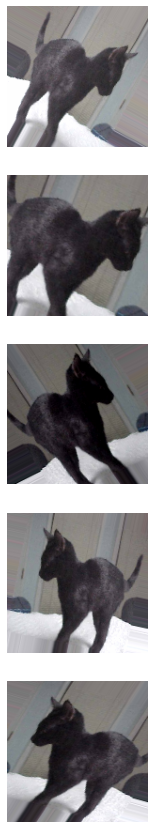

In [ ]:
# 6

# You don't have to do anything for this cell. train_data_gen is created just 
#like before but with the new train_image_generator. Then, a single image is 
#plotted five different times using different variations.

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

#print(train_data_gen[0][0].shape) # (128, 150, 150, 3)
#print(train_data_gen.n) # 2000
#print(train_data_gen.labels.size) # 2000 labels

# PERSONAL NOTE: train_data_gen receives 16 batches of batch_size=128 images
#at a time (previously defined), each image with a shape of 150x150
#(height x width) and 3 channels.

# applying data augmentation on the first image of the training data through train data generator
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# 7

# 7.1. In this cell, create a model for the neural network that outputs class 
#probabilities. It should use the Keras Sequential model. It will probably 
#involve a stack of Conv2D and MaxPooling2D layers...

# Build Convolutional Base (a stack of Conv2D and MaxPooling2D layers)
# (i.e., build the inputs)
model = Sequential()
model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)) )
model.add( MaxPooling2D(pool_size=(2, 2)) )
model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

# PERSONAL NOTE: These two type of layers (convolutional and MaxPooling) will
#extract the features from the image. Going to process 32 filters of size 3x3 
#over the input shape of the data which is (height, width, channels) = 
#(150, 150, 3). Then, will perform the max pooling operation using 2x2 samples 
#and a stride of 2 (if strides=None (default), it will default to pool_size).
# The ReLU (Rectified Linear Unit) activation function squishes values between 
#zero (0) and positive infinity.

# 7.2. ... and then [involve] a fully connected layer on top that is activated by a ReLU 
#activation function.
# (i.e., build the outputs)
model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dropout(0.1) ) # 0.1 (76%), 0.2 (64%), 0.3 (66%), 0.5 (70%)
model.add( Dense(1, activation='sigmoid') )

# PERSONAL NOTE: Then these extracted features (after finishing the convolutional 
#base) are flattened and fed to densely connected layers that determine the class
#of an image based on the presence of features.
# The Flatten layer changes the shape of the data as to feed it to the 64-node 
#dense layer, followed by the final output layer of 1 neuron (it's possible to 
#reduce to a single neuron because we only have 2 classes: 'cats' and 'dogs').
# The sigmoid activation function squishes values between zero and one.
# Dropout is easily implemented by randomly selecting nodes to be dropped out with a 
#given probability (e.g., 30%) in each weight update cycle. This is how Dropout is 
#implemented in Keras. Dropout is only used during the training of a model and is 
#not used when evaluating the skill of the model.
# More info on Dropout:
#https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

model.summary()
# NOTE: After looking at the summary it's worth noting that 
#the depth (frequency of filters) of our image increases but the spacial 
#dimensions (height and width) reduce (shrinks) drastically.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# 7.3. Compile the model passing the arguments to set the optimizer and loss. Also 
#pass in metrics=['accuracy'] to view training and validation accuracy for each 
#training epoch.

# optimizer = 'rmsprop' # 74%, 76%
# optimizer = 'adam' # 68%
# optimizer = tf.keras.optimizers.experimental.SGD(lr=0.01, momentum=0.9) # 62%

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# More on optimizers:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

# More on built-in loss functions:
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [ ]:
# 8

# Use the fit method on your model to train the network. Make sure to pass in 
#arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

epochs = epochs # 15 (66%, 70%, 76%), 30 (70%)
steps_per_epoch = train_data_gen.n // batch_size # 2000 / 128 ~= 15
validation_steps= val_data_gen.n // batch_size # 1000 / 128 ~= 7
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    patience=3,
    restore_best_weights=True,
    verbose=1)

history = model.fit(
    train_data_gen,
    epochs=epochs, steps_per_epoch=steps_per_epoch,
    validation_data=val_data_gen, validation_steps=validation_steps,
    callbacks=[callback],
    verbose=1,
)

# More on fit method:
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

#verbose -> 'auto', 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 
#2 = one line per epoch

Epoch 1/15
15/15 [==============================] - 87s 6s/step - loss: 0.9048 - accuracy: 0.4861 - val_loss: 0.6909 - val_accuracy: 0.5167
Epoch 2/15
15/15 [==============================] - 76s 5s/step - loss: 0.6904 - accuracy: 0.5401 - val_loss: 0.6926 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 76s 5s/step - loss: 0.6913 - accuracy: 0.5588 - val_loss: 0.6847 - val_accuracy: 0.5435
Epoch 4/15
15/15 [==============================] - 80s 5s/step - loss: 0.6951 - accuracy: 0.5568 - val_loss: 0.6818 - val_accuracy: 0.5692
Epoch 5/15
15/15 [==============================] - 76s 5s/step - loss: 0.6852 - accuracy: 0.5721 - val_loss: 0.6678 - val_accuracy: 0.6272
Epoch 6/15
15/15 [==============================] - 75s 5s/step - loss: 0.6625 - accuracy: 0.6068 - val_loss: 0.6493 - val_accuracy: 0.6585
Epoch 7/15
15/15 [==============================] - 79s 5s/step - loss: 0.6458 - accuracy: 0.6229 - val_loss: 0.6486 - val_accuracy: 0.6116
Epoch 8/15
15/15 [==

In [ ]:
# Evaluate the model to see how well the model performed by looking at its 
#performance on the validation data set
val_loss, val_acc = model.evaluate(val_data_gen, verbose=1)
print(val_acc)

8/8 [==============================] - 10s 1s/step - loss: 0.5538 - accuracy: 0.7000
0.699999988079071


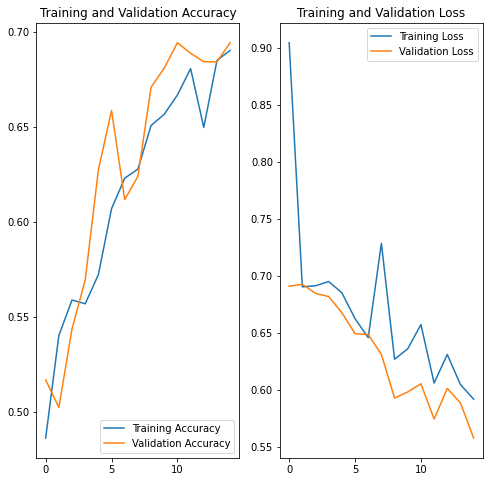

In [ ]:
# 9

# Run this cell to visualize the accuracy and loss of the model.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 138ms/step


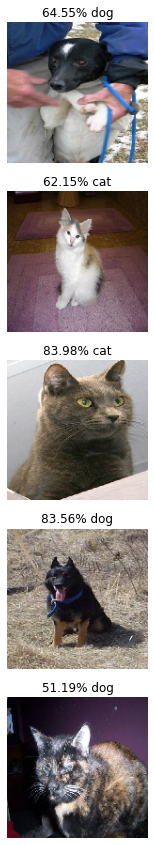

In [ ]:
# 10

# Now it is time to use your model to predict whether a brand new image is a cat 
#or a dog.


# 10.1. In this cell, get the probability that each test image (from test_data_gen) 
#is a dog or a cat. probabilities should be a list of integers.

#train_images, train_labels = next(train_data_gen)
#val_images, val_labels = next(val_data_gen)
test_images, _ = next(test_data_gen)

# probabilities in floating point numbers within a numpy ndarray
probs = model.predict(test_images)

# probabilities in integers within a list
probabilities = np.reshape( np.round(probs), newshape=(50) ).tolist()


# 10.2. Call the plotImages function and pass in the test images and the 
#probabilities corresponding to each test image.
# (I'm just displaying the first 5 images as an example)

plotImages(test_data_gen[0][0][:5], probs[:5])


# After you run the cell, you should see all 50 test images with a label showing 
#the percentage of "sure" that the image is a cat or a dog. The accuracy will 
#correspond to the accuracy shown in the graph above (after running the previous 
#cell). More training images could lead to a higher accuracy.

In [ ]:
# 11

# Run this final cell to see if you passed the challenge or if you need to keep 
#trying.

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
